# ETL and EDA of data tip
## Intro

The purpose of this notebook is to just explore a chunk of data. 

Data: 
- tip.json


## Index 
1. [Data upload](#data-upload)
2. [Data description](#data-description)
3. [Data transformation](#data-transformation)
4. [EDA](#eda)



## Tip

In [25]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 1. Data upload

In [2]:
df_tip = pd.read_json('../../../Datasets/Yelp/tip.json', lines=True)

### 2. Data description

In [3]:
cantidad_de_registros = len(df_tip)
print("Files: ", cantidad_de_registros)

Files:  908915


In [4]:
columnas = df_tip.columns
print("Columns: ",columnas)

Columns:  Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')


In [5]:
print("column info")
df_tip.info()

column info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [6]:
tabla = tabulate(df_tip.head(10), headers='keys', tablefmt='pretty', showindex=False)
print(tabla)

+------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+------------------+
|        user_id         |      business_id       |                                                                                                     text                                                                                                     |        date         | compliment_count |
+------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+------------------+
| AGNUgVwnZUey3gcPCJ76iw | 3uLgwr0qeCNMjKenHJwPGQ |                                                 

In [7]:
# Get information about columns
print(df_tip.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB
None


In [8]:
# see how many nulls there are
df_tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

### 3. EDA 

Descriptive statistics

In [9]:
df_tip.describe()

,compliment_count
count,908915.000000
mean,0.012525
std,0.120763
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


#### 3. 1. Data analitycs

In [21]:
#frequency of compliments
frecuencia_compliment = df_tip['compliment_count'].value_counts()  

In [22]:
frecuencia_compliment

0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: compliment_count, dtype: int64

In [13]:
total_usuarios_distintos = df_tip['user_id'].nunique()
print(f"Total different users: {total_usuarios_distintos}")

Total different users: 301758


In [14]:
# To find the user who made the most tips:
usuario_mas_tips = df_tip['user_id'].value_counts().idxmax()
total_tips_usuario_mas_tips = df_tip['user_id'].value_counts().max()
print(f"User who has made the most tips: {usuario_mas_tips}")
print(f"Total tips made by that user:{total_tips_usuario_mas_tips}")

User who has made the most tips: fCvMnJU1Z-XhAjKg99wK3Q
Total tips made by that user:4071


In [19]:
top_10_negocios = df_tip['business_id'].value_counts().head(10)
print("Top 10 businesses with the most ratings and number of tips:")
for index, valor in top_10_negocios.items():
    num_tips = len(df_tip[df_tip['business_id'] == index])
    print(f"Business: {index} - Tips: {num_tips}")

Top 10 businesses with the most ratings and number of tips:
Business: FEXhWNCMkv22qG04E83Qjg - Tips: 2571
Business: -QI8Qi8XWH3D8y8ethnajA - Tips: 1011
Business: _ab50qdWOk0DdB6XOrBitw - Tips: 932
Business: ytynqOUb3hjKeJfRj5Tshw - Tips: 827
Business: Eb1XmmLWyt_way5NNZ7-Pw - Tips: 826
Business: c_4c5rJECZSfNgFj7frwHQ - Tips: 750
Business: ac1AeYqs8Z4_e2X5M3if2A - Tips: 613
Business: GBTPC53ZrG1ZBY3DT8Mbcw - Tips: 608
Business: iSRTaT9WngzB8JJ2YKJUig - Tips: 606
Business: GXFMD0Z4jEVZBCsbPf4CTQ - Tips: 579


#### 3. 2. Data visualization

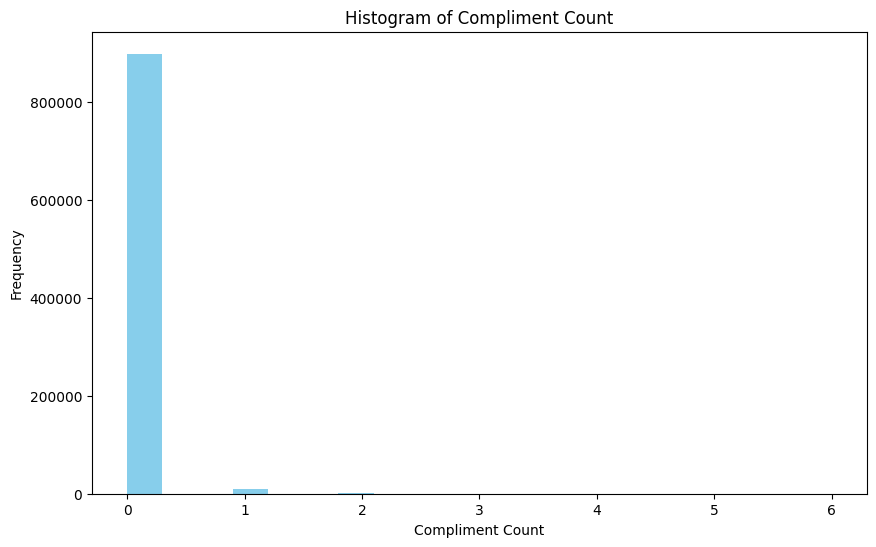

In [61]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.hist(df_tip['compliment_count'], bins=20, color='skyblue')  # Crear el histograma
plt.xlabel('Compliment Count')  # Etiqueta del eje X
plt.ylabel('Frequency')  # Etiqueta del eje Y
plt.title('Histogram of Compliment Count')  # Título del histograma

plt.show()  # Mostrar el histograma

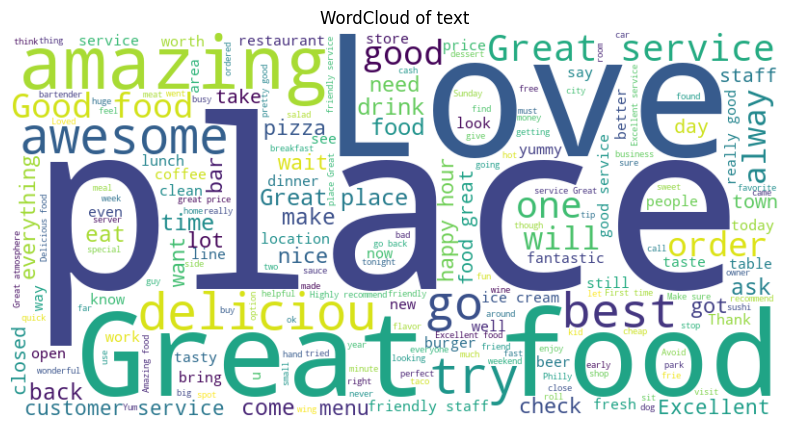

In [60]:
# WordCloud of column text
textos = ' '.join(df_tip['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textos)

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of text')

plt.show()

Analysis of trends over time:

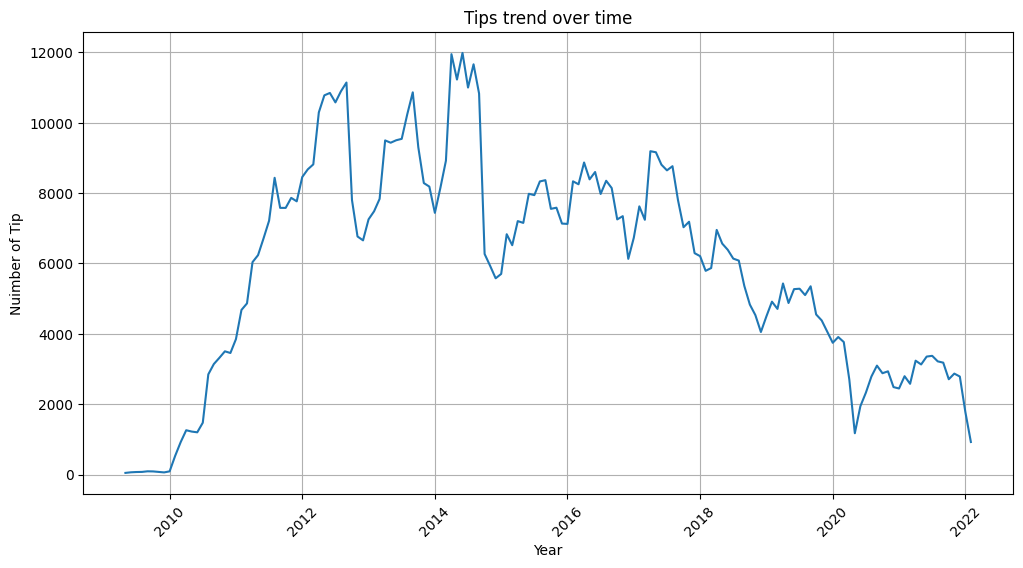

In [58]:

df_tip['date'] = pd.to_datetime(df_tip['date']) 
df_tip['year_month'] = df_tip['date'].dt.to_period('M')  


tips_por_mes = df_tip['year_month'].value_counts().sort_index()


meses_numeros = [mes.year + mes.month / 12 for mes in tips_por_mes.index]

plt.figure(figsize=(12, 6))
plt.plot(meses_numeros, tips_por_mes.values,  linestyle='-')
plt.xlabel('Year')
plt.ylabel('Nuimber of Tip')
plt.title('Tips trend over time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In the period from 2012 to 2018 there are more tips records.

Analysis by day of the week or time of day:

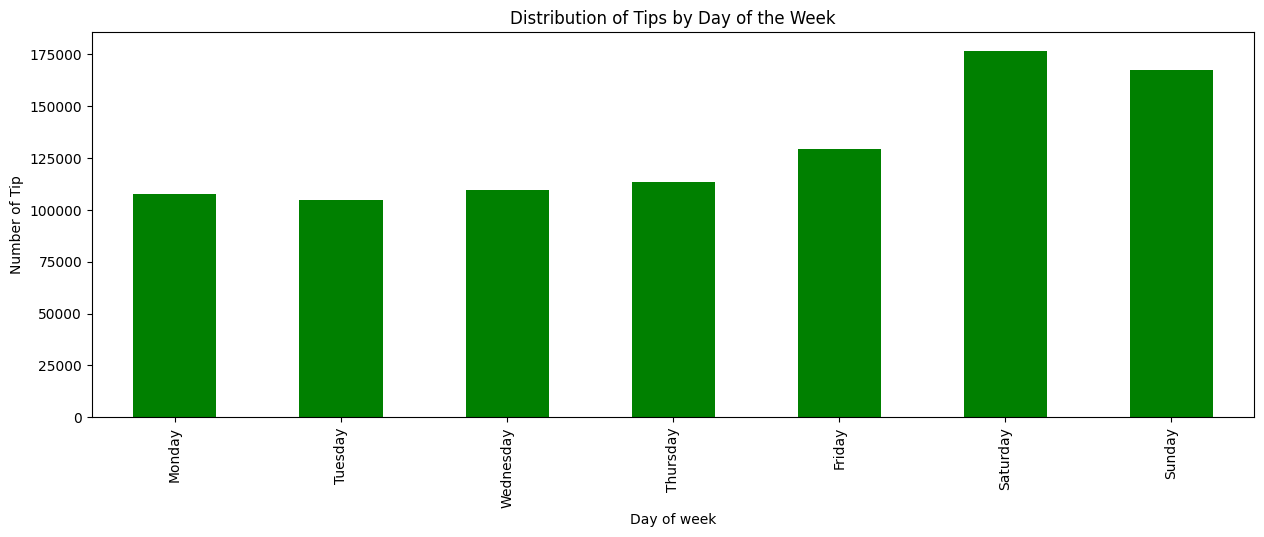

In [51]:
df_tip['day_of_week'] = df_tip['date'].dt.day_name()  

tips_por_dia_semana = df_tip['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 5))
tips_por_dia_semana.plot(kind='bar', color='green')
plt.xlabel('Day of week')
plt.ylabel('Number of Tip')
plt.title('Distribution of Tips by Day of the Week')
plt.show()


The days of the week that receive the most tips is the weekend.

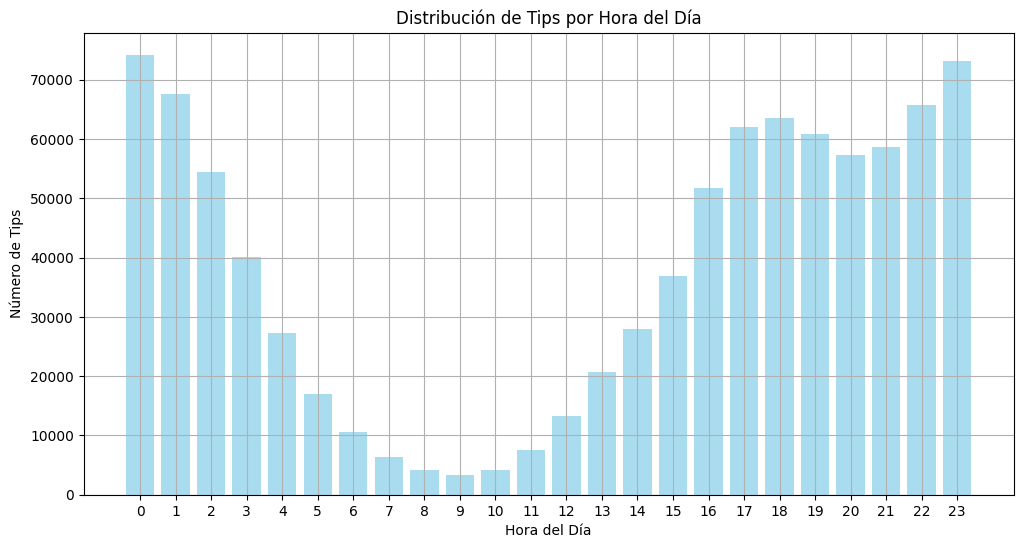

In [62]:
# Supongamos que tienes un DataFrame llamado 'df' con una columna 'date'
df_tip['date'] = pd.to_datetime(df_tip['date'])  # Convertir la columna 'date' a tipo de datos datetime

# Extraer la hora del día de la columna 'date'
df_tip['hour'] = df_tip['date'].dt.hour

# Calcular la cantidad de tips por hora del día
tips_por_hora = df_tip['hour'].value_counts().sort_index()

# Crear un histograma
plt.figure(figsize=(12, 6))
plt.bar(tips_por_hora.index, tips_por_hora.values, color='skyblue', alpha=0.7)
plt.xlabel('Hora del Día')
plt.ylabel('Número de Tips')
plt.title('Distribución de Tips por Hora del Día')
plt.xticks(range(24))  # Mostrar todas las horas en el eje x
plt.grid(True)
plt.show()

It is observed that in the morning the tip records are less frequent, on the other hand during the evening and early morning hours there are more tip records.

#### 3. 3. Outliers

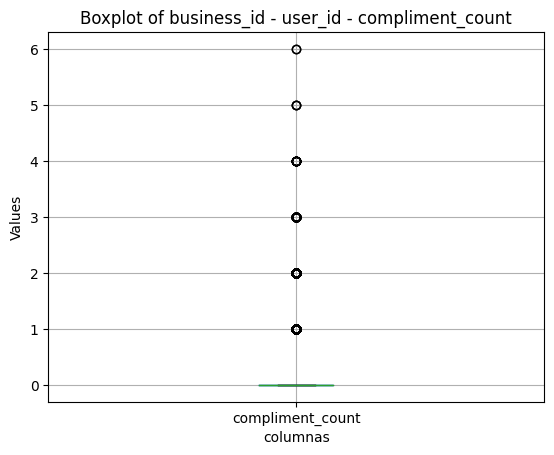

In [35]:
columnas = ['compliment_count'] 			

df_tip[columnas].boxplot()

plt.xlabel('compliment')
plt.ylabel('Values')
plt.title('Boxplot of compliment_count')

plt.show()

With the interquartile range or IQR method (Tukey's fences method) there are xx ouliers records but we do not consider poorly loaded or atypical data.

In [38]:

Q1 = df_tip['compliment_count'].quantile(0.25)
Q3 = df_tip['compliment_count'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_tip.loc[(df_tip['compliment_count'] < limite_inferior) | (df_tip['compliment_count'] > limite_superior)]

print("There are ",len(outliers))

There are  10539


In [39]:
tabla = tabulate(outliers.head(10), headers='keys', tablefmt='pretty', showindex=False)
print(tabla)

+------------------------+------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+------------------+
|        user_id         |      business_id       |                                                                                                                                       text                                                                                                                                       |        date         | compliment_count |
+------------------------+------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Export data tip

In [65]:
df_tip['date'] = pd.to_datetime(df_tip['date']) 
df_tip['year'] = df_tip['date'].dt.year  


In [66]:
df_tip

,user_id,business_id,text,date,compliment_count,year_month,day_of_week,hour,year
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0,2012-05,Friday,2,2012
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,2013-02,Tuesday,18,2013
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0,2013-08,Sunday,0,2013
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0,2017-06,Tuesday,23,2017
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0,2012-10,Saturday,19,2012
...,...,...,...,...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0,2021-09,Saturday,19,2021
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0,2021-10,Saturday,11,2021
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0,2021-11,Friday,13,2021
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0,2021-11,Saturday,16,2021


In [70]:
df_tip['year'].value_counts()  

2012    110459
2014    109160
2013    107563
2016     94333
2017     93909
2015     89686
2011     83395
2018     67033
2019     57646
2021     34993
2020     32436
2010     26712
2022       925
2009       665
Name: year, dtype: int64

In [67]:
df_tip.to_csv('../../../Datasets/Yelp/tip.csv', index=False)

In [68]:
tip_filtrado = df_tip[(df_tip['year'] >= 2018) & (df_tip['year'] <= 2022)]

In [69]:
tip_filtrado.to_csv('../../../Datasets/Yelp/tip_2018_2022.csv', index=False)